In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Data Frame

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/BertNet/summer-products-with-rating-and-performance_2020-08.csv")

In [ ]:
df

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,...,5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,1,3.07,28,11.0,...,4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,EUR,100,0,3.71,59,24.0,...,210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,EUR,100,0,2.50,2,0.0,...,31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08


In [ ]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

# Indexing out the images that are failed to load.

In [ ]:
"""import requests
from PIL import Image
from io import BytesIO
import pandas as pd
import numpy as np


pd.set_option('display.max_colwidth', None)

# Initialize a counter for failed image loads
failed_count = 0
index_list = []

# Function to load image with custom headers and row index
def load_image(url, index):
    global failed_count, index_list # Use the global count
    headers = {'User-Agent': 'Mozilla/5.0'}

    try:
        response = requests.get(url, headers=headers, timeout=2)  # Set a low timeout limit
        response.raise_for_status()  # Raise an error for bad responses
        return np.array(Image.open(BytesIO(response.content)).resize((128, 128), Image.LANCZOS))
    except requests.exceptions.RequestException as e:
        print(f"Failed to load image from {url} at row {index}. Error: {e}")
        failed_count += 1  # Increment the counter for failed loads
        index_list.append(index)
        return None

# Load images into DataFrame, passing the index to the load_image function
df['image_pixel'] = [load_image(url, index) for index, url in enumerate(df['product_picture'])]

# Check the DataFrame to see if images are loaded correctly
# print(df[['product_picture', 'image_pixel']])

# Print the total number of failed image loads
print(f"Total failed image loads: {failed_count}")
print(index_list)"""

'import requests\nfrom PIL import Image\nfrom io import BytesIO\nimport pandas as pd\nimport numpy as np\n\n\npd.set_option(\'display.max_colwidth\', None)\n\n# Initialize a counter for failed image loads\nfailed_count = 0\nindex_list = []\n\n# Function to load image with custom headers and row index\ndef load_image(url, index):\n    global failed_count, index_list # Use the global count\n    headers = {\'User-Agent\': \'Mozilla/5.0\'}\n\n    try:\n        response = requests.get(url, headers=headers, timeout=2)  # Set a low timeout limit\n        response.raise_for_status()  # Raise an error for bad responses\n        return np.array(Image.open(BytesIO(response.content)).resize((128, 128), Image.LANCZOS))\n    except requests.exceptions.RequestException as e:\n        print(f"Failed to load image from {url} at row {index}. Error: {e}")\n        failed_count += 1  # Increment the counter for failed loads\n        index_list.append(index)\n        return None\n\n# Load images into DataF

In [ ]:
index_list = [0, 4, 10, 22, 24, 37, 43, 50, 52, 53, 62, 77, 78, 85, 96, 97, 100, 111, 116, 134, 146, 148, 159, 165, 172, 176, 177, 188, 191, 197, 208, 210, 213, 232, 244, 246, 249, 251, 252, 255, 288, 291, 292, 298, 302, 305, 306, 310, 318, 324, 327, 329, 331, 341, 347, 350, 362, 375, 387, 388, 393, 397, 398, 411, 438, 439, 456, 467, 479, 484, 494, 495, 518, 519, 523, 538, 540, 548, 549, 550, 557, 558, 574, 590, 614, 615, 625, 635, 636, 637, 644, 647, 652, 659, 666, 673, 687, 689, 696, 699, 703, 709, 716, 739, 743, 750, 755, 757, 763, 783, 785, 789, 801, 816, 817, 826, 829, 836, 840, 844, 858, 868, 871, 884, 891, 892, 894, 902, 906, 913, 916, 923, 935, 937, 938, 945, 950, 953, 958, 970, 977, 979, 980, 982, 986, 991, 993, 995, 1003, 1008, 1017, 1026, 1044, 1065, 1069, 1073, 1078, 1083, 1086, 1096, 1108, 1115, 1124, 1129, 1130, 1138, 1143, 1152, 1182, 1186, 1209, 1228, 1230, 1248, 1250, 1261, 1271, 1276, 1279, 1283, 1294, 1311, 1312, 1323, 1326, 1328, 1330, 1343, 1352, 1353, 1361, 1362, 1366, 1368, 1371, 1374, 1380, 1384, 1386, 1390, 1395, 1403, 1417, 1419, 1422, 1428, 1429, 1435, 1437, 1441, 1444, 1456, 1460, 1464, 1471, 1472, 1474, 1477, 1480, 1488, 1491, 1494, 1495, 1516, 1523, 1537, 1541, 1542, 1558, 1559, 1560, 1564, 1568, 1569, 1570]

## Droping the failed images

In [ ]:
df = df.drop(index_list)

# Reset the index after dropping rows
df = df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1338 non-null   object 
 1   title_orig                    1338 non-null   object 
 2   price                         1338 non-null   float64
 3   retail_price                  1338 non-null   int64  
 4   currency_buyer                1338 non-null   object 
 5   units_sold                    1338 non-null   int64  
 6   uses_ad_boosts                1338 non-null   int64  
 7   rating                        1338 non-null   float64
 8   rating_count                  1338 non-null   int64  
 9   rating_five_count             1297 non-null   float64
 10  rating_four_count             1297 non-null   float64
 11  rating_three_count            1297 non-null   float64
 12  rating_two_count              1297 non-null   float64
 13  rat

# Comparing title and title_orig columns

In [ ]:
# Sample rows
print("\nComparing first few rows of title and title_orig:")
print(f"title: {df['title'].iloc[0]}")
print(f"title_orig: {df['title_orig'].iloc[0]}")

# Check for any null values
print("\nNull values check:")
print("Nulls in title:", df['title'].isnull().sum())
print("Nulls in title_orig:", df['title_orig'].isnull().sum())

# Check if there are differences between the columns
differences = (df['title'] != df['title_orig']).sum()
print(f"\nNumber of rows where title differs from title_orig: {differences}")

# Compare lengths
print("\nAverage length comparison:")
print("Average title length:", df['title'].str.len().mean())
print("Average title_orig length:", df['title_orig'].str.len().mean())


Comparing first few rows of title and title_orig:
title: SSHOUSE Summer Casual Sleeveless Soirée Party Soirée sans manches Vêtements de plage sexy Mini robe femme wshC1612242400387A21
title_orig: Women's Casual Summer Sleeveless Sexy Mini Dress

Null values check:
Nulls in title: 0
Nulls in title_orig: 0

Number of rows where title differs from title_orig: 1208

Average length comparison:
Average title length: 115.7727952167414
Average title_orig length: 101.69357249626307


## Removing the "title" column and replacing the "title_orig" column as title

In [ ]:
import re

# Drop 'title' and keep 'title_orig'
df = df.drop('title', axis=1)

# Optionally rename 'title_orig' to 'title' for clarity
df = df.rename(columns={'title_orig': 'title'})

"""
# Basic preprocessing for the title column
def preprocess_title(text):
    # Convert to lowercase
    text = text.lower()
    # Remove any product codes (alphanumeric sequences)
    text = re.sub(r'\b[a-zA-Z0-9]+\d+[a-zA-Z0-9]+\b', '', text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

df['title'] = df['title'].apply(preprocess_title)"""

"\n# Basic preprocessing for the title column\ndef preprocess_title(text):\n    # Convert to lowercase\n    text = text.lower()\n    # Remove any product codes (alphanumeric sequences)\n    text = re.sub(r'\x08[a-zA-Z0-9]+\\d+[a-zA-Z0-9]+\x08', '', text)\n    # Remove extra whitespace\n    text = ' '.join(text.split())\n    return text\n\ndf['title'] = df['title'].apply(preprocess_title)"

# Applying log transformation on the price columns

### Log Transformation
Helps normalize the price distribution,
Reduces the impact of price outliers,
Makes the relationship more linear for modeling

In [ ]:
df['log_price'] = [np.log(p) for p in df["price"]]
df['log_retail_price'] = [np.log(p) for p in df["retail_price"]]

# Discount ratio

In [ ]:
df["discount_ratio"] = [df["price"][i]/float(df["retail_price"][i]) for i in range(len(df["price"]))]

# Sales

In [ ]:
df["units_sold"].describe()

,units_sold
count,1338.000000
mean,4522.314649
std,9602.597587
min,1.000000
25%,100.000000
50%,1000.000000
75%,5000.000000
max,100000.000000


<ipython-input-16-afe21ca3250a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sales_100', palette=['blue', 'orange'], ax=axes[0])
<ipython-input-16-afe21ca3250a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sales_1000', palette=['blue', 'orange'], ax=axes[1])
<ipython-input-16-afe21ca3250a>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sales_5000', palette=['blue', 'orange'], ax=axes[2])


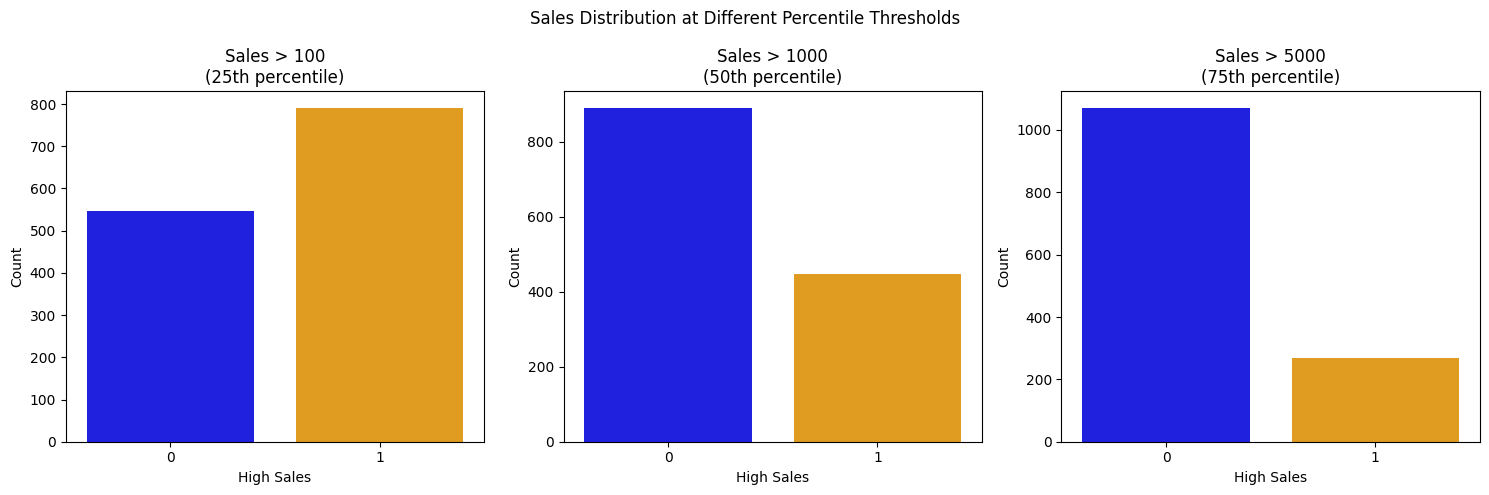


Distribution at each threshold:

Sales > 100 (25th percentile):
sales_100
1    59.12
0    40.88
Name: proportion, dtype: float64 %

Sales > 1000 (50th percentile):
sales_1000
0    66.59
1    33.41
Name: proportion, dtype: float64 %

Sales > 5000 (75th percentile):
sales_5000
0    80.04
1    19.96
Name: proportion, dtype: float64 %


In [ ]:
# Create different sales thresholds based on distribution
sales_100 = [1 if sales > 100 else 0 for sales in df["units_sold"]]    # 25th percentile
sales_1000 = [1 if sales > 1000 else 0 for sales in df["units_sold"]]  # 50th percentile (median)
sales_5000 = [1 if sales > 5000 else 0 for sales in df["units_sold"]]  # 75th percentile

df['sales_100'] = sales_100
df['sales_1000'] = sales_1000
df['sales_5000'] = sales_5000

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Sales Distribution at Different Percentile Thresholds')

# Plot for sales > 100 (25th percentile)
sns.countplot(data=df, x='sales_100', palette=['blue', 'orange'], ax=axes[0])
axes[0].set_title('Sales > 100\n(25th percentile)')
axes[0].set_xlabel('High Sales')
axes[0].set_ylabel('Count')

# Plot for sales > 1000 (50th percentile)
sns.countplot(data=df, x='sales_1000', palette=['blue', 'orange'], ax=axes[1])
axes[1].set_title('Sales > 1000\n(50th percentile)')
axes[1].set_xlabel('High Sales')
axes[1].set_ylabel('Count')

# Plot for sales > 5000 (75th percentile)
sns.countplot(data=df, x='sales_5000', palette=['blue', 'orange'], ax=axes[2])
axes[2].set_title('Sales > 5000\n(75th percentile)')
axes[2].set_xlabel('High Sales')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

# Print the distribution for each threshold
print("\nDistribution at each threshold:")
print("\nSales > 100 (25th percentile):")
print(df['sales_100'].value_counts(normalize=True).multiply(100).round(2), "%")
print("\nSales > 1000 (50th percentile):")
print(df['sales_1000'].value_counts(normalize=True).multiply(100).round(2), "%")
print("\nSales > 5000 (75th percentile):")
print(df['sales_5000'].value_counts(normalize=True).multiply(100).round(2), "%")

In [ ]:
sales = [1 if sales > 100 else 0 for sales in df["units_sold"]]
df['high_sale'] = sales

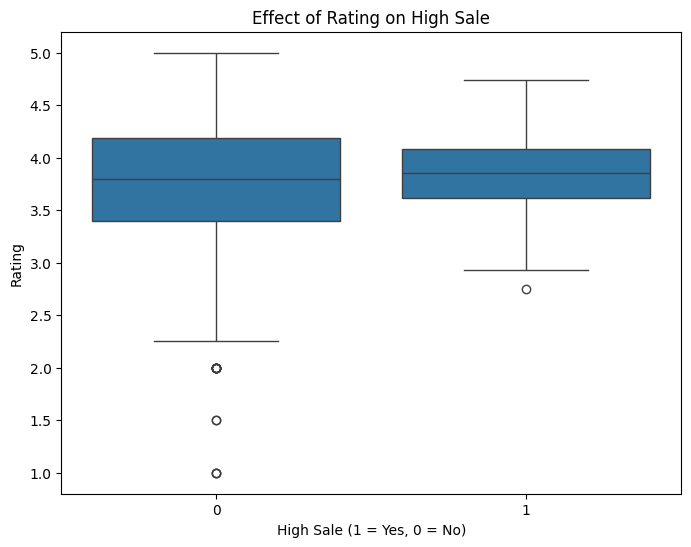

In [ ]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='high_sale', y='rating', data=df)

# Adding labels and title
plt.xlabel('High Sale (1 = Yes, 0 = No)')
plt.ylabel('Rating')
plt.title('Effect of Rating on High Sale')

# Show the plot
plt.show()

In [ ]:
df.columns

Index(['title', 'price', 'retail_price', 'currency_buyer', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count',
       'rating_four_count', 'rating_three_count', 'rating_two_count',
       'rating_one_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'urgency_text', 'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month', 'log_price', 'log_retail_price',
       'discount_ratio', 'sales_100', 'sales_1000', 'sales_5000', '

# Meta Data Features

In [ ]:
df['currency_buyer'].unique()

array(['EUR'], dtype=object)

In [ ]:
df[['rating','uses_ad_boosts']]

,rating,uses_ad_boosts
0,3.45,1
1,3.57,0
2,4.03,1
3,5.00,0
4,3.84,0
...,...,...
1333,3.79,1
1334,3.54,1
1335,4.25,1
1336,2.50,0


In [ ]:
df['urgent'] = [1 if s == "Quantité limitée !" else 0 for s in df["urgency_text"]]

In [ ]:
df['inventory_total']

,inventory_total
0,50
1,50
2,50
3,50
4,50
...,...
1333,50
1334,50
1335,50
1336,50


In [ ]:
df['has_urgency_banner'] = df['has_urgency_banner'].fillna(0)
df['has_urgency_banner']

,has_urgency_banner
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
1333,1.0
1334,0.0
1335,0.0
1336,0.0


In [ ]:
df['origin_country'].unique()

array(['CN', 'US', nan, 'VE', 'SG', 'GB'], dtype=object)

In [ ]:
#Replacing ana with mode
mode_value = df['origin_country'].mode()[0]

df['origin_country'] = df['origin_country'].fillna(mode_value)
df['origin_country'].unique()

array(['CN', 'US', 'VE', 'SG', 'GB'], dtype=object)

In [ ]:
df['theme'].unique()

array(['summer'], dtype=object)

In [ ]:
df['crawl_month'].unique()

array(['2020-08'], dtype=object)

# Product Information

In [ ]:
df[['product_color','product_variation_size_id','product_variation_inventory']]

,product_color,product_variation_size_id,product_variation_inventory
0,green,XS,50
1,leopardprint,XS,1
2,black,M,50
3,navyblue,Size-XS,1
4,white,XS,50
...,...,...,...
1333,skyblue,XS,1
1334,black,S,50
1335,black,M,50
1336,white,Size S.,36


In [ ]:
def main_color(s):
  main_color = {"red":"red", "white":"white", "pink":"pink", "yellow":"yellow", "green":"green", "blue":"blue", "wine":"red", "burgundy":"red", "black":"black", "navy":"navy", "orange":"orange",
  "rose":"pink", "gray":"gray", "grey":"gray", "purple":"purple", "violet":"purple", "army":"green", "leopard":"orange", "ivory":"white",
  "brown":"brown", "coffee":"brown", "camel":"beige", "tan":"brown", "nude":"beige", "khaki":"khaki", "apricot":"yellow", "camouflage":"green", "jasper":"red"}  # ordered by importance
  for key, value in main_color.items():
    if key in s:
      return value
  return "others"

In [ ]:
product_color = df["product_color"]
product_color = [s.lower() if type(s) is str else 'nan' for s in product_color]
product_color = [main_color(s) for s in product_color]
product_color

['green',
 'orange',
 'black',
 'blue',
 'white',
 'blue',
 'black',
 'others',
 'blue',
 'orange',
 'red',
 'yellow',
 'black',
 'red',
 'white',
 'blue',
 'red',
 'green',
 'black',
 'green',
 'green',
 'others',
 'white',
 'pink',
 'white',
 'others',
 'black',
 'khaki',
 'black',
 'yellow',
 'white',
 'blue',
 'green',
 'pink',
 'black',
 'white',
 'black',
 'white',
 'green',
 'green',
 'red',
 'white',
 'black',
 'blue',
 'pink',
 'red',
 'white',
 'orange',
 'white',
 'red',
 'blue',
 'khaki',
 'white',
 'white',
 'red',
 'blue',
 'white',
 'yellow',
 'white',
 'red',
 'green',
 'orange',
 'black',
 'black',
 'white',
 'green',
 'white',
 'pink',
 'green',
 'gray',
 'red',
 'green',
 'green',
 'pink',
 'white',
 'others',
 'pink',
 'black',
 'black',
 'gray',
 'green',
 'pink',
 'red',
 'orange',
 'black',
 'green',
 'black',
 'white',
 'yellow',
 'gray',
 'black',
 'white',
 'red',
 'green',
 'black',
 'black',
 'others',
 'pink',
 'black',
 'green',
 'purple',
 'green',
 'blac

In [ ]:
from collections import Counter
recounted = Counter(product_color)
recounted

Counter({'green': 126,
         'orange': 24,
         'black': 266,
         'blue': 137,
         'white': 230,
         'others': 76,
         'red': 126,
         'yellow': 99,
         'pink': 112,
         'khaki': 13,
         'gray': 67,
         'purple': 44,
         'brown': 14,
         'navy': 4})

In [ ]:
from matplotlib import colors
# product_color = [(-0.1,-0.1,-0.1,-0.1) if s == "others" else colors.to_rgba(s) for s in product_color]
rgb = []
for s in product_color:
  if s != "others":
    rgb.append(np.array(colors.to_rgb(s)))
rgb = np.array(rgb)
avg_rgb = np.average(rgb, axis=0)
product_colors = [avg_rgb if s == "others" else np.array(colors.to_rgb(s)) for s in product_color]
product_colors

[array([0.        , 0.50196078, 0.        ]),
 array([1.        , 0.64705882, 0.        ]),
 array([0., 0., 0.]),
 array([0., 0., 1.]),
 array([1., 1., 1.]),
 array([0., 0., 1.]),
 array([0., 0., 0.]),
 array([0.52932786, 0.4277089 , 0.41468258]),
 array([0., 0., 1.]),
 array([1.        , 0.64705882, 0.        ]),
 array([1., 0., 0.]),
 array([1., 1., 0.]),
 array([0., 0., 0.]),
 array([1., 0., 0.]),
 array([1., 1., 1.]),
 array([0., 0., 1.]),
 array([1., 0., 0.]),
 array([0.        , 0.50196078, 0.        ]),
 array([0., 0., 0.]),
 array([0.        , 0.50196078, 0.        ]),
 array([0.        , 0.50196078, 0.        ]),
 array([0.52932786, 0.4277089 , 0.41468258]),
 array([1., 1., 1.]),
 array([1.        , 0.75294118, 0.79607843]),
 array([1., 1., 1.]),
 array([0.52932786, 0.4277089 , 0.41468258]),
 array([0., 0., 0.]),
 array([0.94117647, 0.90196078, 0.54901961]),
 array([0., 0., 0.]),
 array([1., 1., 0.]),
 array([1., 1., 1.]),
 array([0., 0., 1.]),
 array([0.        , 0.50196078, 

In [ ]:
df['product_color_rgb'] = [np.array(t) for t in product_colors]

In [ ]:
df['product_color_rgb']

,product_color_rgb
0,"[0.0, 0.5019607843137255, 0.0]"
1,"[1.0, 0.6470588235294118, 0.0]"
2,"[0.0, 0.0, 0.0]"
3,"[0.0, 0.0, 1.0]"
4,"[1.0, 1.0, 1.0]"
...,...
1333,"[0.0, 0.0, 1.0]"
1334,"[0.0, 0.0, 0.0]"
1335,"[0.0, 0.0, 0.0]"
1336,"[1.0, 1.0, 1.0]"


# Badge Information

In [ ]:
df[['badges_count', 'badge_local_product', 'badge_product_quality','badge_fast_shipping']]

,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1333,0,0,0,0
1334,0,0,0,0
1335,1,0,1,0
1336,0,0,0,0


# Shipping Information

In [ ]:
df[['shipping_option_name','shipping_option_price','shipping_is_express','countries_shipped_to']]

,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to
0,Livraison standard,2,0,41
1,Livraison standard,3,0,36
2,Livraison standard,2,0,41
3,Livraison standard,1,0,40
4,Livraison standard,2,0,31
...,...,...,...,...
1333,Livraison standard,1,0,41
1334,Livraison standard,3,0,46
1335,Livraison standard,2,0,44
1336,Livraison standard,3,0,29


In [ ]:
df['shipping_option_name'].unique()

array(['Livraison standard', 'Envio Padrão', 'Standart Gönderi',
       'Standardversand', 'Envío normal', 'Standardowa wysyłka',
       'الشحن القياسي', 'Expediere Standard', 'การส่งสินค้ามาตรฐาน',
       'Standard Shipping', 'ការដឹកជញ្ជូនតាមស្តង់ដារ',
       'Livraison Express', 'Стандартная доставка', 'Spedizione standard',
       'Ekspresowa wysyłka'], dtype=object)

In [ ]:
shipping_mapping = {
    # Standard Shipping variants
    'Livraison standard': 'standard',
    'Envio Padrão': 'standard',
    'Standart Gönderi': 'standard',
    'Standardversand': 'standard',
    'Envío normal': 'standard',
    'Standardowa wysyłka': 'standard',
    'الشحن القياسي': 'standard',
    'Expediere Standard': 'standard',
    'การส่งสินค้ามาตรฐาน': 'standard',
    'Standard Shipping': 'standard',
    'ការដឹកជញ្ជូនតាមស្តង់ដារ': 'standard',
    'Стандартная доставка': 'standard',
    'Spedizione standard': 'standard',

    # Express Shipping variants
    'Livraison Express': 'express',
    'Ekspresowa wysyłka': 'express'
}

# Create new standardized shipping column
df['shipping_type'] = df['shipping_option_name'].map(shipping_mapping)

# Verify the standardization
print("\nUnique values in standardized shipping_type:")
print(df['shipping_type'].value_counts())


Unique values in standardized shipping_type:
shipping_type
standard    1334
express        4
Name: count, dtype: int64


In [ ]:
df['shipping_type']

,shipping_type
0,standard
1,standard
2,standard
3,standard
4,standard
...,...
1333,standard
1334,standard
1335,standard
1336,standard


# Merchant Information

In [ ]:
df[['merchant_title','merchant_name','merchant_info_subtitle','merchant_rating_count','merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture']]

,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture
0,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN
1,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN
2,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN
3,zhoulinglinga,zhoulinglinga,75 % avis positifs (65 notes),65,3.507692,5e4b9c3801ba9d210036fc5a,0,NaN
4,Unique Li Fashion Shop,uniquelifashionshopbb657bfe91d211e598c7063a14d...,"86 % avis positifs (10,194 notes)",10194,4.076516,5652f4053a698c76dc9a3f37,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...
...,...,...,...,...,...,...,...,...
1333,bujizhan,bujizhan,"(4,080 notes)",4080,3.987990,584a7a381591451e4e3af3df,0,NaN
1334,SCOMELY,scomely,"86 % avis positifs (1,926 notes)",1926,4.071651,593402ae25c4f54ed4e0abdf,0,NaN
1335,Rell Mail,rellmail,"88 % avis positifs (16,803 notes)",16803,4.155032,56455b13b15aab129db58cb7,0,NaN
1336,modai,modai,77 % avis positifs (31 notes),31,3.774194,5d56b32c40defd78043d5af9,0,NaN


We dont focus on the merchant information much, so we just considered the rating count

In [ ]:
df['log_merchant_rating_count'] = [np.log(p) for p in df["merchant_rating_count"]]
df['log_merchant_rating_count']

,log_merchant_rating_count
0,9.784253
1,5.686975
2,10.078784
3,4.174387
4,9.229555
...,...
1333,8.313852
1334,7.563201
1335,9.729313
1336,3.433987


# Droping unnecessary columns

In [ ]:
df.columns

Index(['title', 'price', 'retail_price', 'currency_buyer', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count',
       'rating_four_count', 'rating_three_count', 'rating_two_count',
       'rating_one_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'urgency_text', 'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month', 'log_price', 'log_retail_price',
       'discount_ratio', 'sales_100', 'sales_1000', 'sales_5000', '

In [ ]:
df = df.drop(['rating_five_count','rating_four_count','rating_three_count','rating_two_count','rating_one_count','tags','sales_100', 'sales_1000', 'sales_5000','shipping_option_name','merchant_title','merchant_name','merchant_info_subtitle','merchant_rating_count',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture','product_picture',
       'product_id', 'theme', 'crawl_month'], axis=1)

In [ ]:
df.columns

Index(['title', 'price', 'retail_price', 'currency_buyer', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 'urgency_text', 'origin_country',
       'merchant_rating', 'product_url', 'log_price', 'log_retail_price',
       'discount_ratio', 'high_sale', 'urgent', 'product_color_rgb',
       'shipping_type', 'log_merchant_rating_count'],
      dtype='object')

In [ ]:
df.head(1)

,title,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,...,merchant_rating,product_url,log_price,log_retail_price,discount_ratio,high_sale,urgent,product_color_rgb,shipping_type,log_merchant_rating_count
0,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,0,0,...,3.899673,https://www.wish.com/c/58940d436a0d3d5da4e95a38,2.079442,3.091042,0.363636,1,1,"[0.0, 0.5019607843137255, 0.0]",standard,9.784253


#Text Preprocessing

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# loading in all the essentials for data manipulation
import pandas as pd
import numpy as np
#load inthe NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams
# We can use counter to count the objects
from collections import Counter
# This is our visual library
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

In [ ]:
def word_frequency(sentence):
  # joins all the sentenses
  sentence =" ".join(sentence)
  # creates tokens, creates lower class, removes numbers and lemmatizes the words
  new_tokens = word_tokenize(sentence)
  new_tokens = [t.lower() for t in new_tokens]
  new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
  new_tokens = [t for t in new_tokens if t.isalpha()]
  lemmatizer = WordNetLemmatizer()
  new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
  #counts the words, pairs and triplets
  counted = Counter(new_tokens)
  counted_2= Counter(ngrams(new_tokens,2))
  counted_3= Counter(ngrams(new_tokens,3))
  #creates 3 data frames and returns thems
  word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
  word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
  triplets =pd.DataFrame(counted_3.items(),columns=['triplets','frequency']).sort_values(by='frequency',ascending=False)
  return word_freq,word_pairs,triplets

In [ ]:
data2, data3, data4 = word_frequency(df['title'].tolist())

In [ ]:
print(data3.columns)
data3['pairs'] = data3['pairs'].astype(str)
print(data3.dtypes)

Index(['pairs', 'frequency'], dtype='object')
pairs        object
frequency     int64
dtype: object


In [ ]:
data4

,triplets,frequency
68,"(plus, size, woman)",104
357,"(dress, plus, size)",100
153,"(summer, woman, fashion)",66
42,"(plus, size, summer)",60
83,"(woman, summer, casual)",52
...,...,...
4641,"(woman, sexy, cropped)",1
4639,"(waist, summer, mini)",1
4638,"(collect, waist, summer)",1
4637,"(strap, collect, waist)",1


In [ ]:
print(data4.columns)
data4['triplets'] = data4['triplets'].astype(str)
print(data4.dtypes)

Index(['triplets', 'frequency'], dtype='object')
triplets     object
frequency     int64
dtype: object


<Axes: xlabel='frequency', ylabel='triplets'>

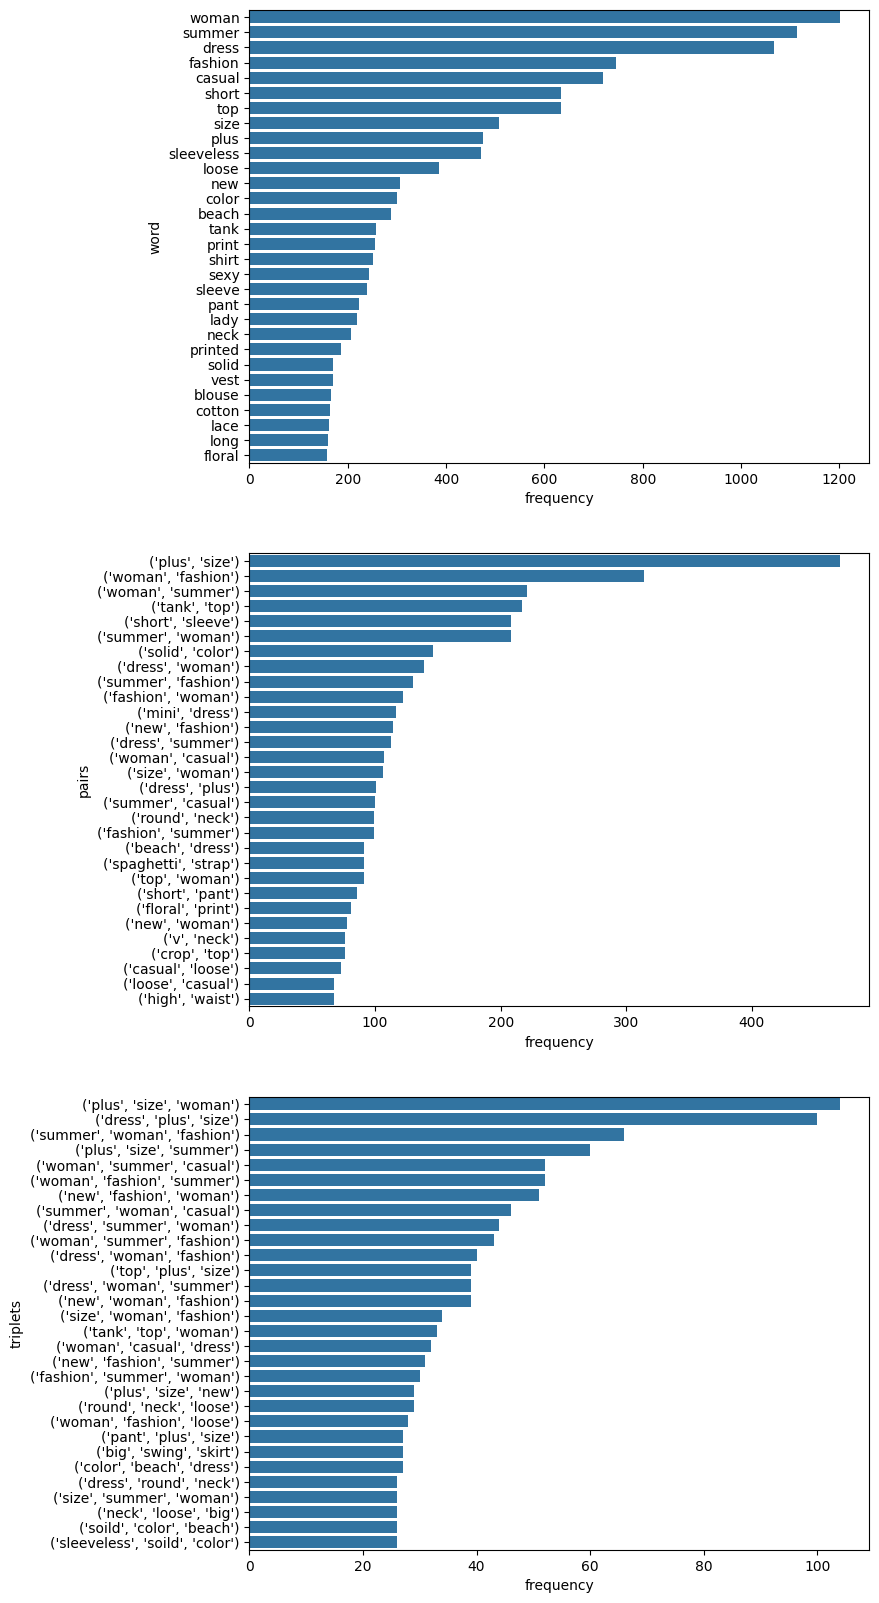

In [ ]:
# create subplot of the different data frames
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=data2.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3.head(30))
sns.barplot(ax=axes[2],x='frequency',y='triplets',data=data4.head(30))

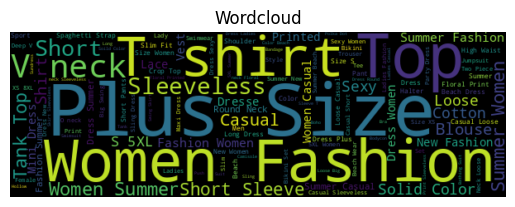

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_words=1500, width=600, background_color='black').generate(" ".join(df['title']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud")
plt.axis("off")
plt.show()

In [ ]:
def calculate_description_similarity(df, description_column):
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df[description_column])

    # Calculate pairwise similarity
    similarity_matrix = (tfidf_matrix * tfidf_matrix.T).toarray()

    # Create DataFrame with similarity scores
    similarity_df = pd.DataFrame(
        similarity_matrix,
        index=df.index,
        columns=df.index
    )

    return similarity_df

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
results = calculate_description_similarity(df, 'title')
print(results)

          0         1         2         3         4         5         6     \
0     1.000000  0.024321  0.031525  0.130090  0.017973  0.243120  0.355363   
1     0.024321  1.000000  0.034018  0.010173  0.004769  0.007718  0.019346   
2     0.031525  0.034018  1.000000  0.013187  0.127236  0.035712  0.162512   
3     0.130090  0.010173  0.013187  1.000000  0.078355  0.012166  0.058880   
4     0.017973  0.004769  0.127236  0.078355  1.000000  0.035470  0.040725   
...        ...       ...       ...       ...       ...       ...       ...   
1333  0.030055  0.110284  0.019748  0.012572  0.016789  0.009538  0.139986   
1334  0.071080  0.058555  0.062723  0.007625  0.000000  0.385444  0.229134   
1335  0.102342  0.010928  0.041281  0.264769  0.016401  0.013069  0.226694   
1336  0.234325  0.038311  0.052390  0.044647  0.110114  0.216201  0.268841   
1337  0.022091  0.005862  0.021645  0.009240  0.025062  0.007010  0.190849   

          7         8         9     ...      1328      1329    

In [ ]:
def analyze_sentiment_distribution(df, description_column):
    """
    Analyze sentiment distribution in product descriptions
    """
    sia = SentimentIntensityAnalyzer()

    sentiments = []
    for desc in df[description_column]:
        sentiment_scores = sia.polarity_scores(desc)
        sentiments.append(sentiment_scores)

    sentiment_df = pd.DataFrame(sentiments)

    return sentiment_df

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
results = analyze_sentiment_distribution(df, 'title')
print(results)

        neg    neu    pos  compound
0     0.000  0.490  0.510    0.6369
1     0.000  1.000  0.000    0.0000
2     0.000  0.643  0.357    0.8360
3     0.138  0.659  0.204    0.0258
4     0.124  0.699  0.177    0.2500
...     ...    ...    ...       ...
1333  0.000  1.000  0.000    0.0000
1334  0.000  1.000  0.000    0.0000
1335  0.000  0.873  0.127    0.1531
1336  0.000  1.000  0.000    0.0000
1337  0.000  0.603  0.397    0.5574

[1338 rows x 4 columns]


## Word2Vec

In [ ]:
def process_sentence(sentence):
  new_tokens = word_tokenize(sentence)
  new_tokens = [t.lower() for t in new_tokens]
  new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
  new_tokens = [t for t in new_tokens if t.isalpha()]
  lemmatizer = WordNetLemmatizer()
  new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
  return new_tokens

In [ ]:
titles = df['title'].tolist()
data = [process_sentence(t) for t in titles]
data[0]

['woman', 'casual', 'summer', 'sleeveless', 'sexy', 'mini', 'dress']

In [ ]:
from gensim.models import Word2Vec

# Train Word2Vec model
model = Word2Vec(sentences=data,
                vector_size=100,  # dimensionality of vectors
                window=5,         # maximum distance between current and predicted word
                min_count=1,      # ignore words that appear less than this
                workers=4)        # number of CPU cores to use

# Example of using the model
# Get vector for a word
vector = model.wv['dress']

# Find similar words
similar_words = model.wv.most_similar('dress')

print("Most similar words to 'dress':")
print(similar_words)

# Create document vectors by averaging word vectors
def get_doc_vector(tokens):
    doc_vector = []
    for token in tokens:
        if token in model.wv:
            doc_vector.append(model.wv[token])
    if doc_vector:
        return np.mean(doc_vector, axis=0)
    return np.zeros(model.vector_size)

# Create document vectors for all titles
title_vectors = [get_doc_vector(tokens) for tokens in data]

# Convert to numpy array
title_vectors = np.array(title_vectors)

print("\nShape of title vectors:", title_vectors.shape)

Most similar words to 'dress':
[('maxi', 0.999020516872406), ('long', 0.9989705681800842), ('party', 0.9989584684371948), ('mini', 0.9989322423934937), ('skirt', 0.9988205432891846), ('floral', 0.998810887336731), ('neck', 0.9986537098884583), ('sling', 0.9986504912376404), ('beach', 0.9986444711685181), ('boho', 0.9986404776573181)]

Shape of title vectors: (1338, 100)


In [ ]:
#model = gensim.models.Word2Vec(sentences=data, window=5, min_count=1, workers=4)
#model.train(data,total_examples=len(data),epochs=10)

In [ ]:
print(model.wv['dress'])  # Find the vector of the word.
print(model.wv.most_similar('dress', topn=10))  # 10 Most similar words for inspection.

[-0.1051089   0.20458624 -0.04081143 -0.00763881  0.08910302 -0.4197085
  0.14261715  0.51578754 -0.24756908 -0.26994497 -0.04140088 -0.42839497
 -0.01745532  0.10650242  0.15222816 -0.13977395  0.24329697 -0.23134406
 -0.09024899 -0.72789854  0.14414316  0.11345707  0.21031934 -0.10479745
 -0.09023542  0.08335717 -0.27903813 -0.01078805 -0.11667096  0.15190798
  0.3905191  -0.07510457  0.1776515  -0.32521152 -0.20382796  0.33264905
  0.16653539 -0.0129033  -0.15068105 -0.34525067  0.15328054 -0.374937
 -0.10678194  0.02268678  0.33100283 -0.1327338  -0.22155677 -0.19864032
  0.14158659  0.18417165  0.21575809 -0.28051233  0.02234498 -0.01226552
 -0.19868691 -0.00621699  0.12556177 -0.06533211 -0.37680563  0.12179043
  0.06561306 -0.13281648  0.356882    0.01222373 -0.33663923  0.33344442
  0.15085615  0.2722042  -0.5096546   0.43561503 -0.1403121   0.23281245
  0.3140689   0.10353047  0.29575467  0.08199967 -0.00134529  0.01603422
 -0.2197267   0.03228183 -0.19002616 -0.03368675 -0.41

In [ ]:
def caculate_average_word2vec(model, word_list):
  sum = np.matrix([model.wv[w] for w in word_list]).sum(axis=0)
  return sum / len(word_list)

In [ ]:
word2vec_avg = [caculate_average_word2vec(model, d) for d in data]
df['word2vec_avg'] = word2vec_avg

In [ ]:
df['word2vec_avg']

,word2vec_avg
0,[[[[[-0.11554363 0.20905745 -0.03445083 0.00...
1,[[[[[-8.49448070e-02 1.54855177e-01 -2.549189...
2,[[[[[-1.08104639e-01 1.94956630e-01 -3.325878...
3,[[[[[-0.09651514 0.17124419 -0.02193206 -0.00...
4,[[[[[-0.09101637 0.1729164 -0.02383802 0.00...
...,...
1333,[[[[[-1.04509994e-01 1.87890485e-01 -2.924262...
1334,[[[[[-9.41236019e-02 1.71634451e-01 -3.282002...
1335,[[[[[-0.10549566 0.18755703 -0.02757314 -0.00...
1336,[[[[[-1.02775998e-01 1.91806048e-01 -3.350751...


In [ ]:
df = df.drop(['title', 'price', 'retail_price', 'currency_buyer', 'units_sold','urgency_text', 'origin_country'], axis=1)

In [ ]:
df.columns

Index(['uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 'merchant_rating', 'product_url', 'log_price',
       'log_retail_price', 'discount_ratio', 'high_sale', 'urgent',
       'product_color_rgb', 'shipping_type', 'log_merchant_rating_count',
       'word2vec_avg'],
      dtype='object')

In [ ]:
data = df[['log_price','log_retail_price','discount_ratio','uses_ad_boosts','badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping','shipping_option_price',
          'shipping_is_express', 'countries_shipped_to', 'inventory_total','urgent',
       'product_color_rgb', 'log_merchant_rating_count',
       'word2vec_avg','high_sale']]

In [ ]:
data.columns

Index(['log_price', 'log_retail_price', 'discount_ratio', 'uses_ad_boosts',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'urgent',
       'product_color_rgb', 'log_merchant_rating_count', 'word2vec_avg',
       'high_sale'],
      dtype='object')

In [ ]:
data.head(1)

,log_price,log_retail_price,discount_ratio,uses_ad_boosts,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,urgent,product_color_rgb,log_merchant_rating_count,word2vec_avg,high_sale
0,2.079442,3.091042,0.363636,1,0,0,0,0,2,0,41,50,1,"[0.0, 0.5019607843137255, 0.0]",9.784253,[[[[[-0.11554363 0.20905745 -0.03445083 0.00...,1


In [ ]:
data['word2vec_avg'][0].shape

(1, 100)

In [ ]:
import os
folder_path = "/content/gdrive/MyDrive/BertNet"
file_path = os.path.join(folder_path, "data.csv")
data.to_csv(file_path, index=False)

# NN

In [ ]:
data_rf = data
rgb = data_rf["product_color_rgb"]
rgb = np.stack(rgb.values, axis=0)
for i in range(3):
  data_rf["product_color_rgb"+str(i)] = rgb[:,i]

<ipython-input-76-7234cdab7806>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rf["product_color_rgb"+str(i)] = rgb[:,i]
<ipython-input-76-7234cdab7806>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rf["product_color_rgb"+str(i)] = rgb[:,i]
<ipython-input-76-7234cdab7806>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [ ]:
data_rf

,log_price,log_retail_price,discount_ratio,uses_ad_boosts,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,urgent,product_color_rgb,log_merchant_rating_count,word2vec_avg,high_sale,product_color_rgb0,product_color_rgb1,product_color_rgb2
0,2.079442,3.091042,0.363636,1,0,0,0,0,2,0,41,50,1,"[0.0, 0.5019607843137255, 0.0]",9.784253,[[[[[-0.11554363 0.20905745 -0.03445083 0.00...,1,0.0,0.501961,0.0
1,2.079442,3.761200,0.186047,0,0,0,0,0,3,0,36,50,1,"[1.0, 0.6470588235294118, 0.0]",5.686975,[[[[[-8.49448070e-02 1.54855177e-01 -2.549189...,0,1.0,0.647059,0.0
2,2.079442,2.079442,1.000000,1,0,0,0,0,2,0,41,50,0,"[0.0, 0.0, 0.0]",10.078784,[[[[[-1.08104639e-01 1.94956630e-01 -3.325878...,1,0.0,0.000000,0.0
3,1.366092,2.197225,0.435556,0,0,0,0,0,1,0,40,50,0,"[0.0, 0.0, 1.0]",4.174387,[[[[[-0.09651514 0.17124419 -0.02193206 -0.00...,0,0.0,0.000000,1.0
4,1.945910,1.791759,1.166667,0,0,0,0,0,2,0,31,50,0,"[1.0, 1.0, 1.0]",9.229555,[[[[[-0.09101637 0.1729164 -0.02383802 0.00...,1,1.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1.098612,2.079442,0.375000,1,0,0,0,0,1,0,41,50,1,"[0.0, 0.0, 1.0]",8.313852,[[[[[-1.04509994e-01 1.87890485e-01 -2.924262...,0,0.0,0.000000,1.0
1334,2.397895,4.897840,0.082090,1,0,0,0,0,3,0,46,50,0,"[0.0, 0.0, 0.0]",7.563201,[[[[[-9.41236019e-02 1.71634451e-01 -3.282002...,0,0.0,0.000000,0.0
1335,2.079442,1.945910,1.142857,1,1,0,1,0,2,0,44,50,0,"[0.0, 0.0, 0.0]",9.729313,[[[[[-0.10549566 0.18755703 -0.02757314 -0.00...,1,0.0,0.000000,0.0
1336,2.564949,2.397895,1.181818,0,0,0,0,0,3,0,29,50,0,"[1.0, 1.0, 1.0]",3.433987,[[[[[-1.02775998e-01 1.91806048e-01 -3.350751...,0,1.0,1.000000,1.0


In [ ]:
word2vec = data_rf["word2vec_avg"]
word2vec = np.stack(word2vec.values, axis=0)
for i in range(100):
  data_rf["word2vec_avg"+str(i)] = word2vec[:,i]

<ipython-input-78-ebed766fa5a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rf["word2vec_avg"+str(i)] = word2vec[:,i]
<ipython-input-78-ebed766fa5a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rf["word2vec_avg"+str(i)] = word2vec[:,i]
<ipython-input-78-ebed766fa5a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [ ]:
data_rf['word2vec_avg0']

,word2vec_avg0
0,-0.115544
1,-0.084945
2,-0.108105
3,-0.096515
4,-0.091016
...,...
1333,-0.104510
1334,-0.094124
1335,-0.105496
1336,-0.102776


In [ ]:
#data_rf.replace([np.inf, -np.inf], np.nan, inplace=True)
data_rf = data_rf.dropna()

In [ ]:
list(data_rf.columns)

['log_price',
 'log_retail_price',
 'discount_ratio',
 'uses_ad_boosts',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'shipping_option_price',
 'shipping_is_express',
 'countries_shipped_to',
 'inventory_total',
 'urgent',
 'product_color_rgb',
 'log_merchant_rating_count',
 'word2vec_avg',
 'high_sale',
 'product_color_rgb0',
 'product_color_rgb1',
 'product_color_rgb2',
 'word2vec_avg0',
 'word2vec_avg1',
 'word2vec_avg2',
 'word2vec_avg3',
 'word2vec_avg4',
 'word2vec_avg5',
 'word2vec_avg6',
 'word2vec_avg7',
 'word2vec_avg8',
 'word2vec_avg9',
 'word2vec_avg10',
 'word2vec_avg11',
 'word2vec_avg12',
 'word2vec_avg13',
 'word2vec_avg14',
 'word2vec_avg15',
 'word2vec_avg16',
 'word2vec_avg17',
 'word2vec_avg18',
 'word2vec_avg19',
 'word2vec_avg20',
 'word2vec_avg21',
 'word2vec_avg22',
 'word2vec_avg23',
 'word2vec_avg24',
 'word2vec_avg25',
 'word2vec_avg26',
 'word2vec_avg27',
 'word2vec_avg28',
 'word2vec_avg29',
 'word2vec_avg30',

In [ ]:
X = data_rf[data_rf.columns.difference(['high_sale', 'product_color_rgb', 'word2vec_avg'])]
y = data_rf['high_sale']

In [ ]:
X

,badge_fast_shipping,badge_local_product,badge_product_quality,badges_count,countries_shipped_to,discount_ratio,inventory_total,log_merchant_rating_count,log_price,log_retail_price,...,word2vec_avg90,word2vec_avg91,word2vec_avg92,word2vec_avg93,word2vec_avg94,word2vec_avg95,word2vec_avg96,word2vec_avg97,word2vec_avg98,word2vec_avg99
0,0,0,0,0,41,0.363636,50,9.784253,2.079442,3.091042,...,0.504957,0.175553,0.129997,-0.098784,0.523712,0.190386,0.191347,-0.140616,0.088808,-0.072699
1,0,0,0,0,36,0.186047,50,5.686975,2.079442,3.761200,...,0.376927,0.129749,0.090402,-0.073506,0.385593,0.139715,0.138440,-0.108950,0.065813,-0.047794
2,0,0,0,0,41,1.000000,50,10.078784,2.079442,2.079442,...,0.476021,0.159521,0.115731,-0.088847,0.484708,0.174905,0.177998,-0.133680,0.082149,-0.058894
3,0,0,0,0,40,0.435556,50,4.174387,1.366092,2.197225,...,0.421332,0.138748,0.098936,-0.083080,0.432863,0.157801,0.164797,-0.119638,0.075036,-0.053258
4,0,0,0,0,31,1.166667,50,9.229555,1.945910,1.791759,...,0.417501,0.140340,0.102674,-0.078896,0.426172,0.156320,0.158220,-0.115447,0.071087,-0.056775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0,0,0,0,41,0.375000,50,8.313852,1.098612,2.079442,...,0.452164,0.152352,0.104268,-0.087245,0.462439,0.168042,0.168562,-0.132764,0.078837,-0.053277
1334,0,0,0,0,46,0.082090,50,7.563201,2.397895,4.897840,...,0.414954,0.147112,0.103188,-0.080275,0.424703,0.156124,0.160043,-0.119568,0.072633,-0.060536
1335,0,0,1,1,44,1.142857,50,9.729313,2.079442,1.945910,...,0.462054,0.154709,0.110696,-0.092436,0.478973,0.176339,0.176714,-0.133067,0.082501,-0.058210
1336,0,0,0,0,29,1.181818,50,3.433987,2.564949,2.397895,...,0.456826,0.164065,0.116779,-0.089632,0.474661,0.173206,0.177197,-0.126023,0.079760,-0.069866


In [ ]:
from sklearn.model_selection import train_test_split
# Split into 0.75:0.125:0.125
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

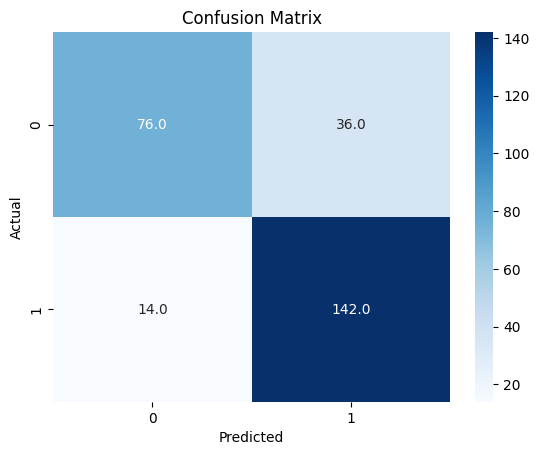

Accuracy: 81.34%
Precision: 0.80
Recall: 0.91
F1 Score: 0.85


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Predict on the test data
y_pred = clf.predict(X_test)

# Generate confusion matrix
cf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cf_mat, annot=True, cmap='Blues', fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# define the keras model
model = Sequential()
model.add(layers.Dense(12, input_dim=117, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=1)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4575 - loss: 1.4213
Epoch 2/150
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6125 - loss: 0.6994
Epoch 3/150
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6079 - loss: 0.6870
Epoch 4/150
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6030 - loss: 0.6794
Epoch 5/150
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5818 - loss: 0.6820
Epoch 6/150
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5861 - loss: 0.6797
Epoch 7/150
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6030 - loss: 0.6752
Epoch 8/150
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5720 - loss: 0.6822
Epoch 9/150
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5656 - loss: 0.6842
Epoch 10/150
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5896 - loss: 0.6777
Epoch 11/150
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5943 - loss: 0.6756
Epoch 12/150
107/107 ━━━━━━━━━━━━━━━━━━━━

# Feature Importance


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.35      0.46       116
           1       0.63      0.86      0.73       152

    accuracy                           0.64       268
   macro avg       0.64      0.60      0.59       268
weighted avg       0.64      0.64      0.61       268


Confusion Matrix:
[[ 41  75]
 [ 22 130]]

Feature Importance:
<bound method NDFrame.head of                   feature  importance
10   countries_shipped_to    0.250328
0               log_price    0.193082
2          discount_ratio    0.192712
1        log_retail_price    0.153290
8   shipping_option_price    0.066565
3          uses_ad_boosts    0.040191
12                 urgent    0.033403
4            badges_count    0.029648
6   badge_product_quality    0.021551
5     badge_local_product    0.006784
11        inventory_total    0.006299
7     badge_fast_shipping    0.005453
9     shipping_is_express    0.000694>


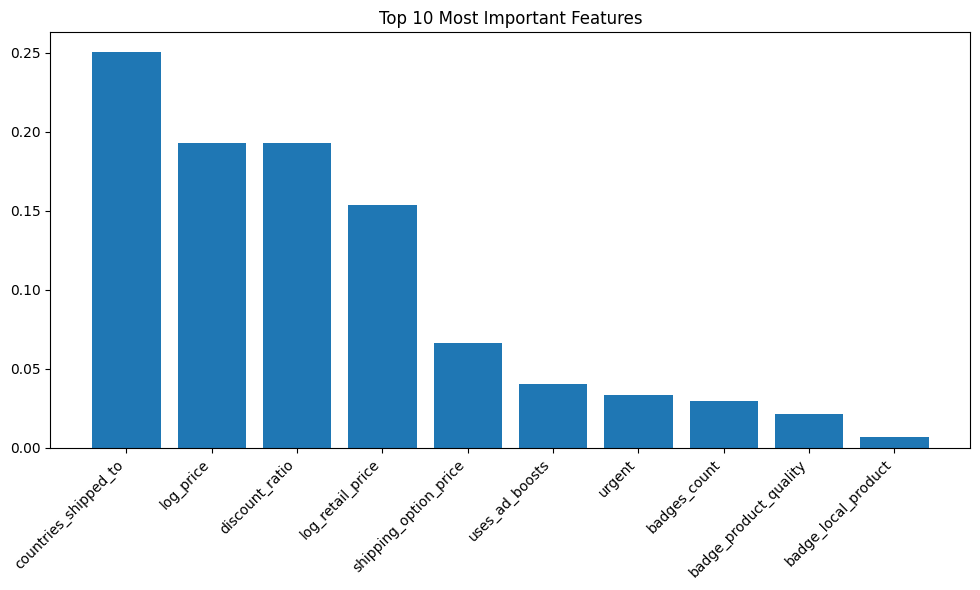

In [ ]:
from sklearn.preprocessing import LabelEncoder
# First, let's organize our 16 selected features
selected_features = [
    'log_price', 'log_retail_price', 'discount_ratio', 'uses_ad_boosts',
    'badges_count', 'badge_local_product', 'badge_product_quality',
    'badge_fast_shipping', 'shipping_option_price', 'shipping_is_express',
    'countries_shipped_to', 'inventory_total', 'urgent'
]

# Prepare the feature matrix X using only selected features
X = df[selected_features].copy()

# Target variable
y = df['high_sale']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=10,      # Maximum depth of trees
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance.head)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()